In [5]:
# Load Data

import pandas as pd
import numpy as np
from src import LinearRegression, r_squared, mse, display_metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/aqar_fm_listings.csv")
print(f"Dataset shape: {df.shape}")


Dataset shape: (6260, 79)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6260 entries, 0 to 6259
Data columns (total 79 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6260 non-null   int64  
 1   title                    6251 non-null   object 
 2   url                      6260 non-null   object 
 3   price                    6260 non-null   float64
 4   meter_price              431 non-null    float64
 5   price_2_payments         617 non-null    float64
 6   price_4_payments         596 non-null    float64
 7   price_12_payments        598 non-null    float64
 8   rnpl_monthly_price       950 non-null    float64
 9   rent_period              835 non-null    float64
 10  area_sqm                 6260 non-null   int64  
 11  deed_area                6249 non-null   float64
 12  num_bedrooms             5487 non-null   float64
 13  num_bathrooms            3523 non-null   float64
 14  num_living_rooms        

In [7]:
# EDA

feature_columns = ['area_sqm', 'num_bedrooms', 'num_bathrooms']
target_column = 'price'

df_clean = df[feature_columns + [target_column]].dropna()
print(f"Dataset shape: {df_clean.shape}")
print(f"\nMissing values:")
print(df_clean.isnull().sum())

print("\nBasic Statistics:")
print(df_clean.describe())


Dataset shape: (3424, 4)

Missing values:
area_sqm         0
num_bedrooms     0
num_bathrooms    0
price            0
dtype: int64

Basic Statistics:
           area_sqm  num_bedrooms  num_bathrooms         price
count   3424.000000   3424.000000    3424.000000  3.424000e+03
mean     248.211157      3.764311       3.080900  7.651597e+05
std      894.136901      1.507291       1.273404  9.606303e+05
min        1.000000      1.000000       1.000000  3.700000e+01
25%      120.000000      3.000000       2.000000  9.500000e+04
50%      168.000000      4.000000       3.000000  5.500000e+05
75%      250.000000      5.000000       4.000000  9.000000e+05
max    50000.000000      7.000000       7.000000  1.400000e+07


In [8]:
# Check for Outliers

import matplotlib.pyplot as plt

print("Checking for outliers:")
print(f"\nPrice range: {df_clean['price'].min():.0f} to {df_clean['price'].max():.0f}")
print(f"Area range: {df_clean['area_sqm'].min():.0f} to {df_clean['area_sqm'].max():.0f}")

q99_price = df_clean['price'].quantile(0.99)
q99_area = df_clean['area_sqm'].quantile(0.99)
print(f"\n99th percentile - Price: {q99_price:.0f}, Area: {q99_area:.0f}")

outliers_price = df_clean[df_clean['price'] > q99_price].shape[0]
outliers_area = df_clean[df_clean['area_sqm'] > q99_area].shape[0]
print(f"Values above 99th percentile - Price: {outliers_price}, Area: {outliers_area}")


Checking for outliers:

Price range: 37 to 14000000
Area range: 1 to 50000

99th percentile - Price: 4134660, Area: 1040
Values above 99th percentile - Price: 35, Area: 34


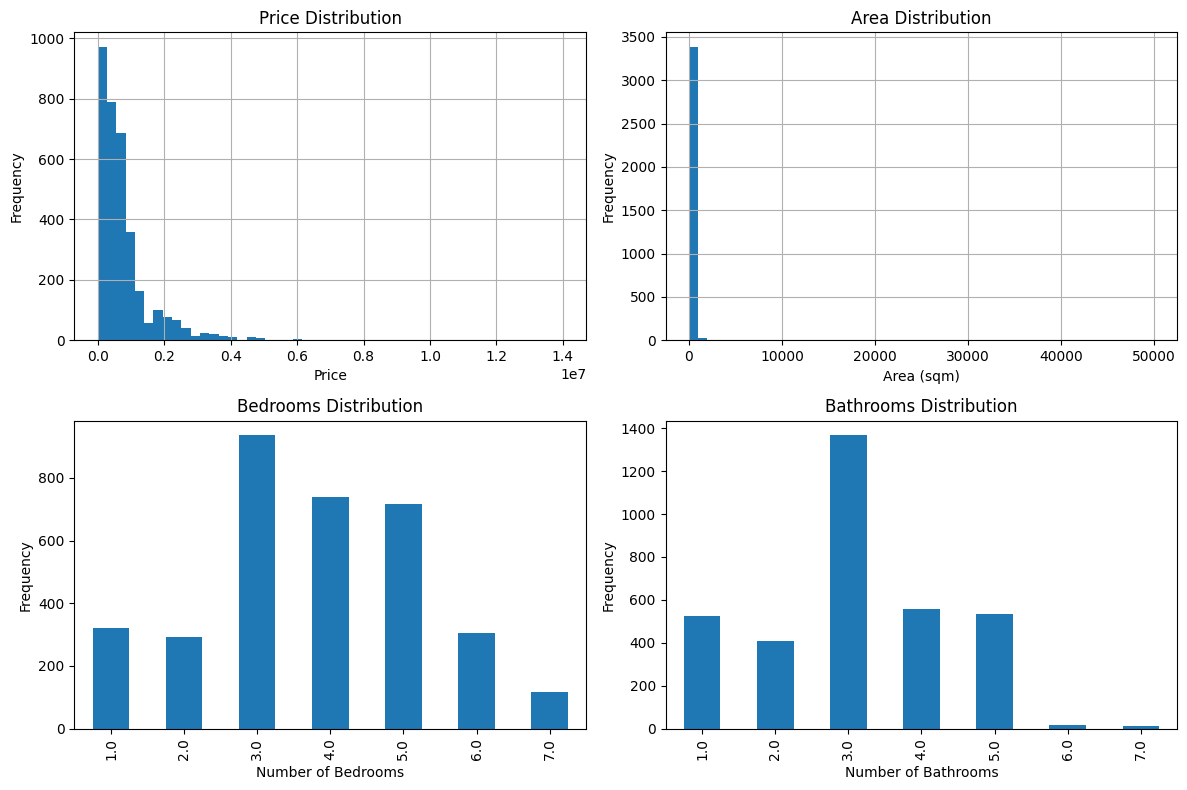

In [9]:
# Distribution of Features

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

df_clean['price'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')

df_clean['area_sqm'].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Area Distribution')
axes[0, 1].set_xlabel('Area (sqm)')
axes[0, 1].set_ylabel('Frequency')

df_clean['num_bedrooms'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Bedrooms Distribution')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Frequency')

df_clean['num_bathrooms'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Bathrooms Distribution')
axes[1, 1].set_xlabel('Number of Bathrooms')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Correlation with Price:
price            1.000000
num_bathrooms    0.515678
num_bedrooms     0.487112
area_sqm         0.050269
Name: price, dtype: float64


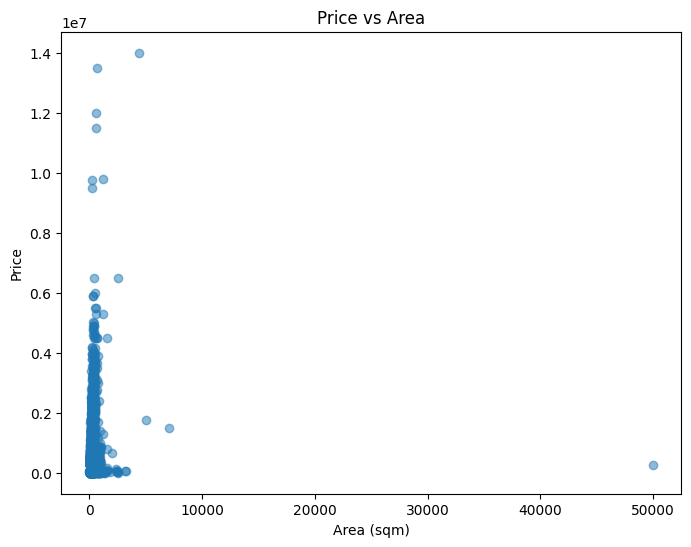

In [10]:
# Correlation Analysis

correlation = df_clean.corr()
print("Correlation with Price:")
print(correlation['price'].sort_values(ascending=False))

plt.figure(figsize=(8, 6))
plt.scatter(df_clean['area_sqm'], df_clean['price'], alpha=0.5)
plt.xlabel('Area (sqm)')
plt.ylabel('Price')
plt.title('Price vs Area')
plt.show()


In [11]:
# Prepare Data for Training

X = df_clean[feature_columns].values
y = df_clean[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTarget statistics - Train: mean={y_train.mean():.0f}, std={y_train.std():.0f}")
print(f"Target statistics - Test: mean={y_test.mean():.0f}, std={y_test.std():.0f}")


Training set: (2739, 3)
Test set: (685, 3)

Target statistics - Train: mean=770060, std=995515
Target statistics - Test: mean=745566, std=805061


## Example 2: Gradient Descent (Iterative Solution)

Gradient descent iteratively updates weights by following the gradient. Great for understanding optimization and scaling to large datasets!


In [12]:
# Train Linear Regression Model

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

print("Model trained successfully!")
print(f"Coefficients: {model.coefficients}")
print(f"Intercept: {model.intercept:.2f}")


Model trained successfully!
Coefficients: [1.53631496e+01 1.55592397e+05 2.67111022e+05]
Intercept: -643141.79


In [13]:
# Make Predictions and Evaluate

y_pred = model.predict(X_test)

print("Model Performance:")
print(f"R² Score: {r_squared(y_test, y_pred):.4f}")
print(f"MSE: {mse(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mse(y_test, y_pred)):.2f}")


Model Performance:
R² Score: 0.3397
MSE: 427958116931.06
RMSE: 654185.08


MODEL PERFORMANCE METRICS

Regression Metrics:
  R² Score:  0.339696
  MSE:       427958116931.061035


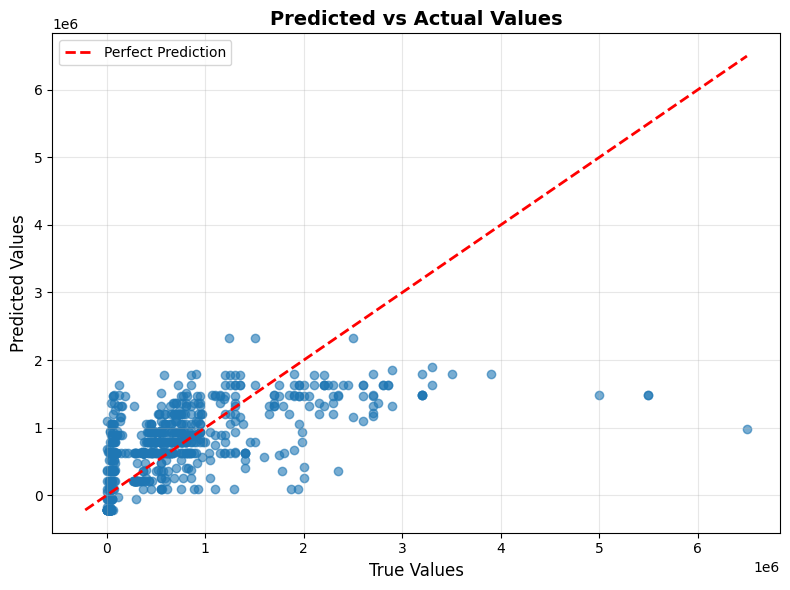

In [14]:
# Display Metrics with Visualization

display_metrics(y_test, y_pred, task_type='regression', plot=True)


# Experiment 2: Random Forest


In [15]:
# Train Random Forest Model

from src import get_random_forest_regressor

rf_model = get_random_forest_regressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest Performance:")
print(f"R² Score: {r_squared(y_test, rf_pred):.4f}")
print(f"MSE: {mse(y_test, rf_pred):.2f}")
print(f"RMSE: {np.sqrt(mse(y_test, rf_pred)):.2f}")


Random Forest Performance:
R² Score: 0.3717
MSE: 407235204089.99
RMSE: 638149.83


MODEL PERFORMANCE METRICS

Regression Metrics:
  R² Score:  0.371670
  MSE:       407235204089.992432


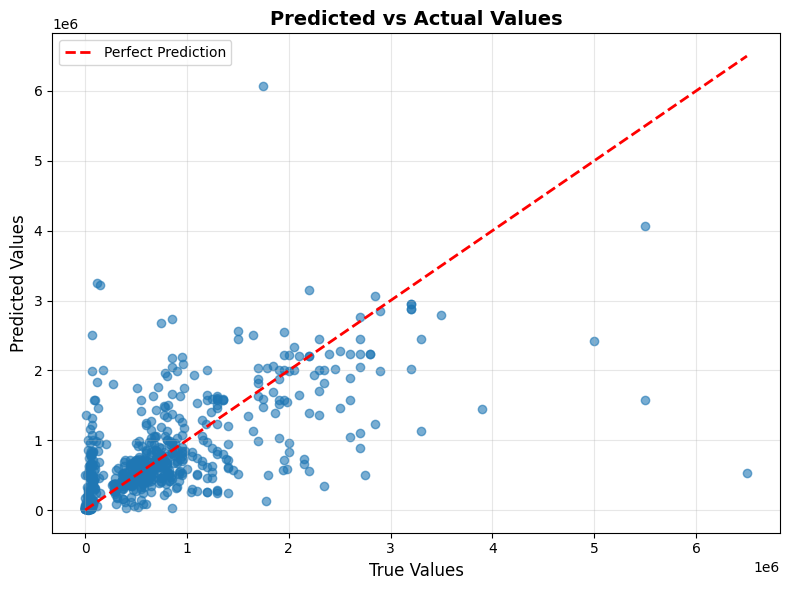

In [16]:
# Display Random Forest Metrics

display_metrics(y_test, rf_pred, task_type='regression', plot=True)


# Experiment 3: Cross Validation


In [17]:
# Cross Validation with Linear Regression

from src import cross_validate
from sklearn.metrics import mean_squared_error

df_cv = df_clean.copy()

best_model, mean_score, std_score, all_scores = cross_validate(
    dataframe=df_cv,
    model=LinearRegression,
    target_col='price',
    k_folds=5,
    metric=mean_squared_error,
    shuffle=True,
    random_state=42
)

print("Cross Validation Results:")
print(f"Mean MSE: {mean_score:.2f} (+/- {std_score:.2f})")
print(f"All fold scores: {[f'{s:.2f}' for s in all_scores]}")


Cross Validation Results:
Mean MSE: 846826732150.85 (+/- 368827389936.82)
All fold scores: ['428239645900.14', '687510694265.74', '863700122589.33', '1528533309272.58', '726149888726.45']


In [18]:
# Evaluate Best Model from Cross Validation

cv_pred = best_model.predict(X_test)

print("Best Model (trained on full data) Performance:")
print(f"R² Score: {r_squared(y_test, cv_pred):.4f}")
print(f"MSE: {mse(y_test, cv_pred):.2f}")
print(f"RMSE: {np.sqrt(mse(y_test, cv_pred)):.2f}")


Best Model (trained on full data) Performance:
R² Score: 0.3428
MSE: 425977996744.30
RMSE: 652669.90


MODEL PERFORMANCE METRICS

Regression Metrics:
  R² Score:  0.342751
  MSE:       425977996744.303284


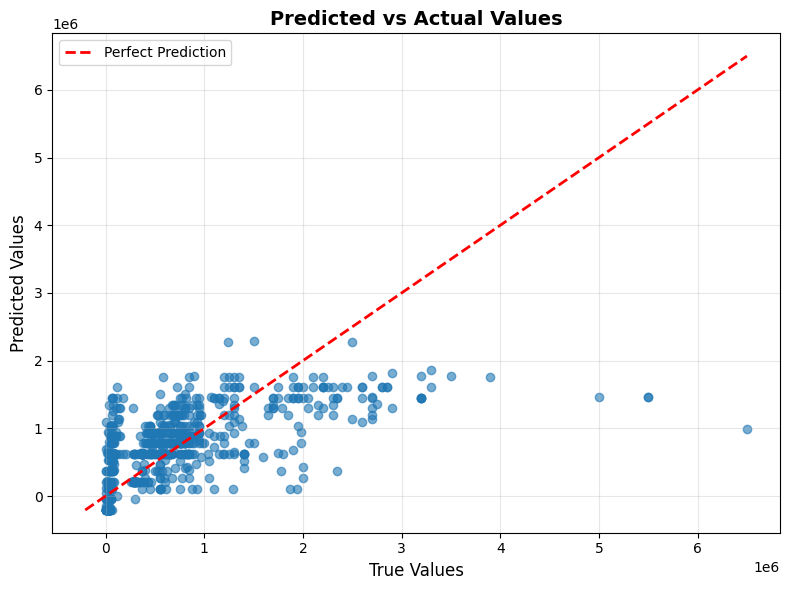

In [19]:
# Display Cross Validation Model Metrics

display_metrics(y_test, cv_pred, task_type='regression', plot=True)
